In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
import os
import glob
from tqdm.notebook import tqdm

In [2]:
gaze_pos_data = np.load("../preprocessed_data/goodsubj_gaze_pos.npz", allow_pickle=True)
gaze_pos = gaze_pos_data["gaze_data_goodsubj"]

In [3]:
num_subj = len(gaze_pos)

In [4]:
dist_mat = np.zeros((num_subj, num_subj))
for i in range(num_subj):
    for j in range(num_subj):
        if i > j:
            gaze_diff = gaze_pos[i] - gaze_pos[j]
            diff_norm = np.linalg.norm(gaze_diff, axis=1)
            dist_mat[i, j] = np.nanmedian(diff_norm)
dist_mat = dist_mat + dist_mat.T

In [5]:
dist_mat_dict = {}
dist_mat_dict["dist_mat"] = dist_mat
dist_mat_dict["gr_goodsubj"] = gaze_pos_data["gr_goodsubj"]
dist_mat_dict["group_name"] = gaze_pos_data["group_name"]

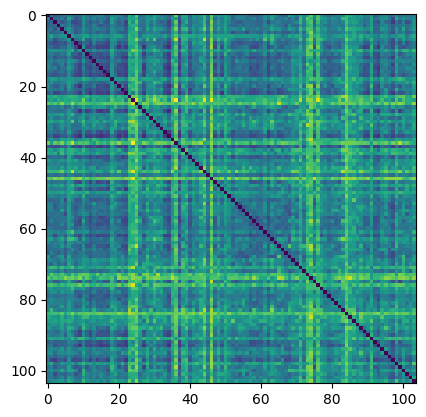

In [6]:
plt.imshow(dist_mat)

In [7]:
np.savez_compressed("../preprocessed_data/subj2subj_dist.npz", **dist_mat_dict)